# Model Evaluation - Plots

Generate publication-ready plots from CSV results in `outputs/eval-metrics/`.
Save plots to `outputs/eval-plots/`.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Directories
INPUT_DIR = Path("../outputs/eval-metrics")
OUTPUT_DIR = Path("../outputs/eval-plots")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Clean style with white background
plt.style.use("ggplot")
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 9,
    "axes.labelsize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.facecolor": "white",
    "axes.edgecolor": "#cccccc",
    "axes.grid": True,
    "grid.color": "#e0e0e0",
    "grid.linewidth": 0.8,
    "axes.axisbelow": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "figure.facecolor": "white",
    "figure.dpi": 150,
    "legend.frameon": False,
})

# Color palette
COLORS = {
    "black": "#000000",
    "blue": "#3063A3",
    "red": "#E8613C",
    "yellow": "#F7B500",
    "purple": "#821C65",
    "green": "#63BB42",
    "light_blue": "#90BDE5",
}

MODEL_COLORS = {
    "UNet++_512": COLORS["black"],
    "UNet++_1024": COLORS["blue"],
    "SegFormer_512": COLORS["red"],
    "SegFormer_1024": COLORS["yellow"],
}

AUG_COLORS = {
    "Baseline": COLORS["black"],
    "Default": COLORS["blue"],
    "Scale": COLORS["red"],
    "Domain": COLORS["yellow"],
}

REGIONAL_COLORS = {
    "North": COLORS["black"],
    "Central": COLORS["blue"],
    "South": COLORS["red"],
}

## Load Data

In [2]:
arch_df = pd.read_csv(INPUT_DIR / "architecture_experiment.csv", index_col=0)
aug_df = pd.read_csv(INPUT_DIR / "augmentation_experiment.csv", index_col=0)
regional_df = pd.read_csv(INPUT_DIR / "regional_cv.csv", index_col=0)
final_df = pd.read_csv(INPUT_DIR / "final_model.csv", index_col=0)

# Rename architecture models for display
arch_rename = {
    "UNet_512": "UNet++_512",
    "UNet_1024": "UNet++_1024",
    "Seg_512": "SegFormer_512",
    "Seg_1024": "SegFormer_1024",
}
arch_df = arch_df.rename(index=arch_rename)

print("Data loaded successfully")

Data loaded successfully


## 1. Architecture Experiment

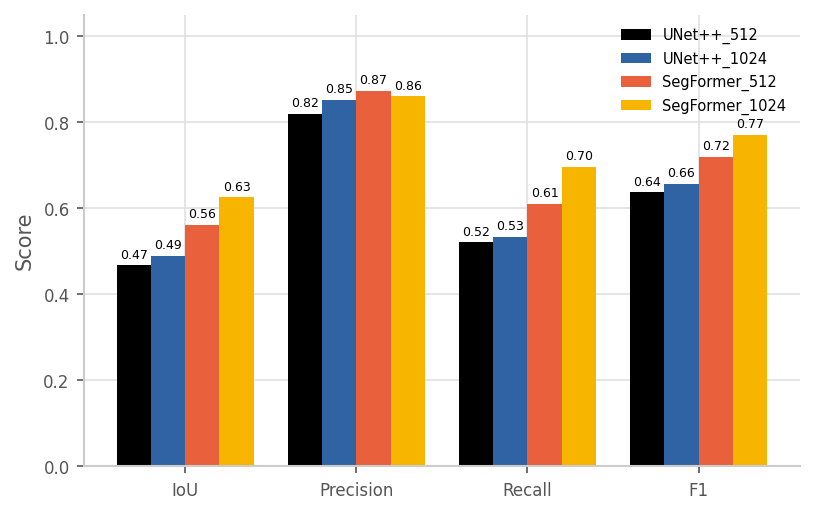

In [3]:
fig, ax = plt.subplots(figsize=(5.5, 3.5))

metrics = ["IoU", "Precision", "Recall", "F1"]
models = list(arch_df.index)
n_metrics = len(metrics)
n_models = len(models)
width = 0.8 / n_models
x = np.arange(n_metrics)

for i, model in enumerate(models):
    offset = (i - n_models/2 + 0.5) * width
    values = [arch_df.loc[model, m] for m in metrics]
    bars = ax.bar(x + offset, values, width, label=model, color=MODEL_COLORS[model])
    
    # Value labels
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f"{val:.2f}", ha="center", va="bottom", fontsize=6)

ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend(loc="upper right", fontsize=7)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "architecture_experiment.png", dpi=300, bbox_inches="tight")
plt.savefig(OUTPUT_DIR / "architecture_experiment.pdf", bbox_inches="tight")
plt.show()

## 2. Augmentation Experiment

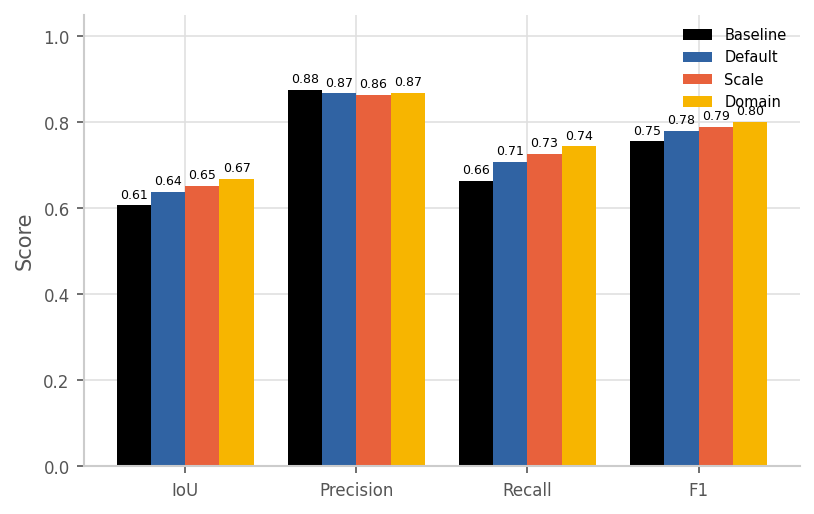

In [4]:
fig, ax = plt.subplots(figsize=(5.5, 3.5))

metrics = ["IoU", "Precision", "Recall", "F1"]
tiers = list(aug_df.index)
n_metrics = len(metrics)
n_tiers = len(tiers)
width = 0.8 / n_tiers
x = np.arange(n_metrics)

for i, tier in enumerate(tiers):
    offset = (i - n_tiers/2 + 0.5) * width
    values = [aug_df.loc[tier, m] for m in metrics]
    bars = ax.bar(x + offset, values, width, label=tier, color=AUG_COLORS[tier])
    
    # Value labels
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f"{val:.2f}", ha="center", va="bottom", fontsize=6)

ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend(loc="upper right", fontsize=7)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "augmentation_experiment.png", dpi=300, bbox_inches="tight")
plt.savefig(OUTPUT_DIR / "augmentation_experiment.pdf", bbox_inches="tight")
plt.show()

## 3. Regional Cross-Validation

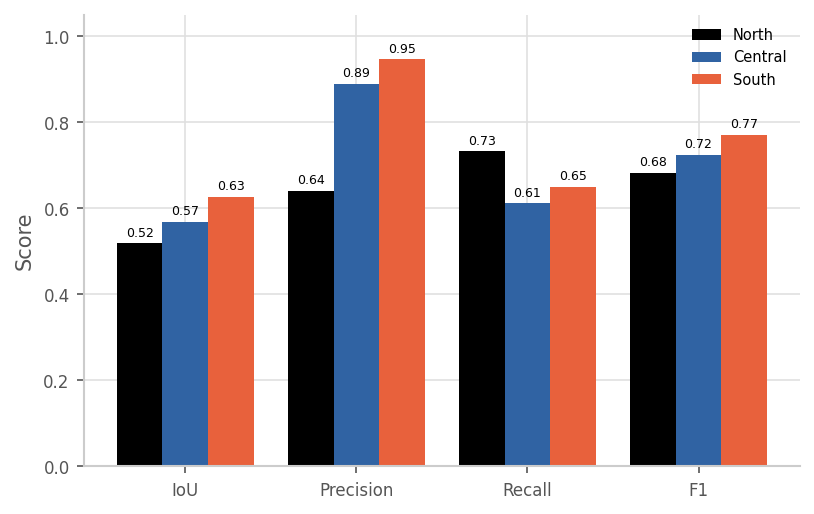

In [5]:
fig, ax = plt.subplots(figsize=(5.5, 3.5))

metrics = ["IoU", "Precision", "Recall", "F1"]
regions = list(regional_df.index)
n_metrics = len(metrics)
n_regions = len(regions)
width = 0.8 / n_regions
x = np.arange(n_metrics)

for i, region in enumerate(regions):
    offset = (i - n_regions/2 + 0.5) * width
    values = [regional_df.loc[region, m] for m in metrics]
    bars = ax.bar(x + offset, values, width, label=region, color=REGIONAL_COLORS[region])
    
    # Value labels
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f"{val:.2f}", ha="center", va="bottom", fontsize=6)

ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend(loc="upper right", fontsize=7)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "regional_cv.png", dpi=300, bbox_inches="tight")
plt.savefig(OUTPUT_DIR / "regional_cv.pdf", bbox_inches="tight")
plt.show()

## 4. Final Model

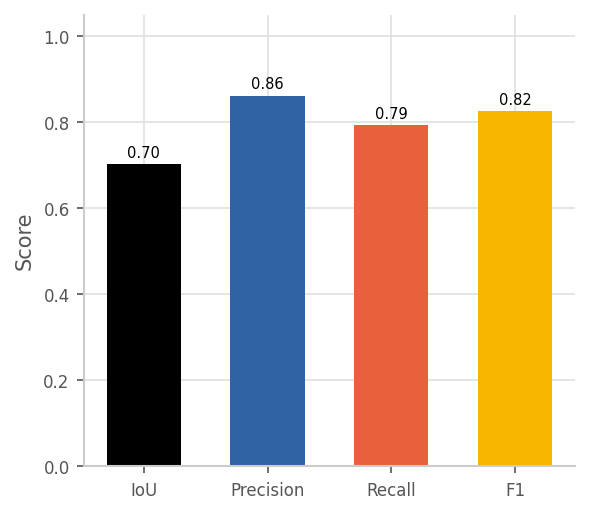

In [6]:
fig, ax = plt.subplots(figsize=(4, 3.5))

metrics = ["IoU", "Precision", "Recall", "F1"]
x = np.arange(len(metrics))
values = [final_df.loc["Test", m] for m in metrics]
colors = [COLORS["black"], COLORS["blue"], COLORS["red"], COLORS["yellow"]]

bars = ax.bar(x, values, color=colors, width=0.6)

# Value labels
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{val:.2f}", ha="center", va="bottom", fontsize=7)

ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "final_model.png", dpi=300, bbox_inches="tight")
plt.savefig(OUTPUT_DIR / "final_model.pdf", bbox_inches="tight")
plt.show()

## 6. Summary Tables

## 5. Summary Tables

In [7]:
print("Architecture Experiment:")
display(arch_df.round(4))

print("\nAugmentation Experiment:")
display(aug_df.round(4))

print("\nRegional CV:")
display(regional_df.round(4))

print("\nFinal Model:")
display(final_df.round(4))

Architecture Experiment:


,IoU,Precision,Recall,F1
UNet++_512,0.4669,0.8199,0.5203,0.6366
UNet++_1024,0.4890,0.8524,0.5342,0.6568
SegFormer_512,0.5606,0.8730,0.6104,0.7185
SegFormer_1024,0.6252,0.8597,0.6963,0.7694



Augmentation Experiment:


,IoU,Precision,Recall,F1
Baseline,0.6064,0.8755,0.6637,0.7550
Default,0.6380,0.8666,0.7075,0.7790
Scale,0.6510,0.8641,0.7252,0.7886
Domain,0.6681,0.8680,0.7436,0.8010



Regional CV:


,IoU,Precision,Recall,F1
Model,,,,
North,0.5182,0.6398,0.7317,0.6827
Central,0.5681,0.8896,0.6111,0.7245
South,0.6265,0.9458,0.6499,0.7704



Final Model:


,IoU,Precision,Recall,F1
Val,0.6531,0.818,0.7641,0.7902
Test,0.7017,0.860,0.7922,0.8247
